In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
%matplotlib inline

In [58]:
telco_data  = pd.read_csv('telco_customer.csv')

In [59]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [61]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
telco_data[telco_data.isnull()==True].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Ok, So our data has no **Null Values** embeded, we can go into plotting the data visually.

Our target is to check if the customer left the company or not. So let's alalyze the **'Churn'** column

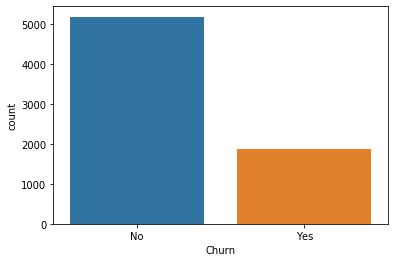

In [63]:
sns.countplot(telco_data['Churn'])

In [64]:
(telco_data.groupby('Churn').count()/7043)*100

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
No,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013
Yes,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987


This means our target for the customer survival analysis "Left the company" in some time duration T is satisfied for **73.46%** and not satisfied for **26.53%**.

This also means we have around **74%** of right censored data for the given T (tenure)

In [65]:
telco_data['TotalCharges']=pd.to_numeric(telco_data['TotalCharges'],errors='coerce')
telco_data['Churn']=telco_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [66]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(3), obj

In [67]:
telco_data[(telco_data['TotalCharges']<2000)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,0
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0


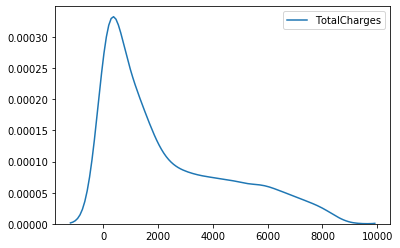

In [90]:
sns.kdeplot(data= telco_data['TotalCharges'])

The density of the given data in the **"TotalCharges"** column seems to be more between 0 and 2000. Basically the PDf rises to the max in (0,2000). the total area covered by the KDE plot is 1.

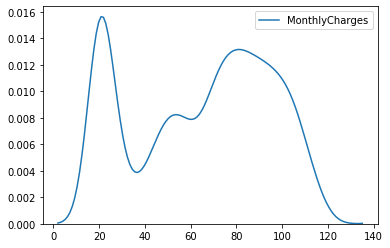

In [69]:
sns.kdeplot(data= telco_data['MonthlyCharges'])

The density of the given data in the **"MonthlyCharges"** column seems to be interesting. Basically the PDF rises to the max near 20 as well as thre are two more bumps near 50-60 and around 80. Again the total area covered by the KDE plot is 1.

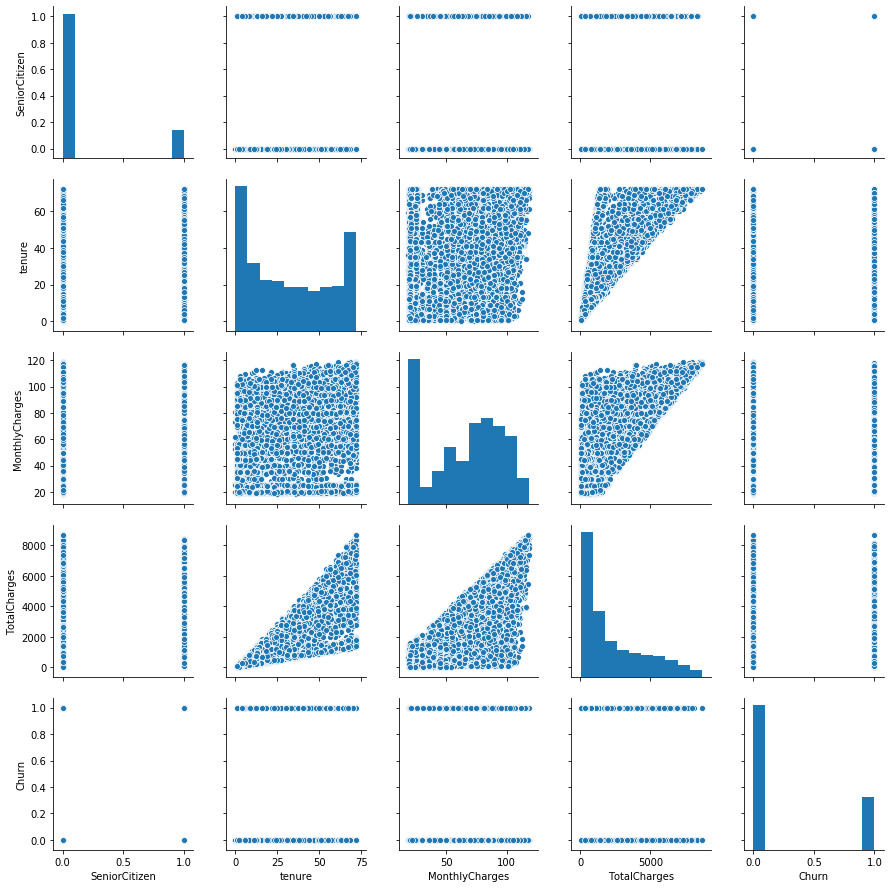

In [92]:
sns.pairplot(telco_data)

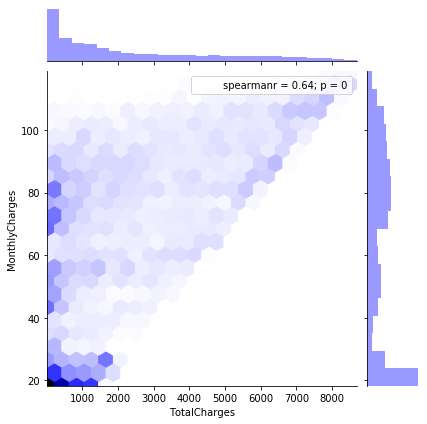

In [94]:
sns.jointplot(x='TotalCharges',y='MonthlyCharges',data=telco_data,kind='hex',color='blue',stat_func=spearmanr)

**"MonthlyCharges"** and **"TotalCharges"** are coorelated positively and the realation is a little bit strong.

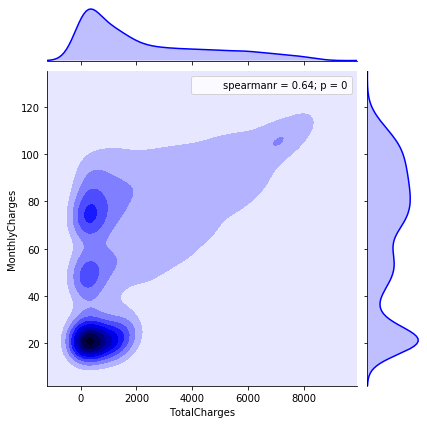

In [72]:
sns.jointplot(x='TotalCharges',y='MonthlyCharges',data=telco_data,kind='kde',color='blue',stat_func=spearmanr)

The kde jointplot between **MonthlyCharges** and **TotalCharges** depicts that the density of the available data is maximum with respect to the variables taken in both the axis,near (0,20) and there are two more concentrations near (0,50) and (0,80). The darker hex/kde region represnets that the given data has been concentrated more in that particular instance.

On a simple note, TotalChrages has a high concentration of data in between 0 and 2000 on it's scale. On a contrary MonthlyCharges has an up and down irregular distribution, which gives rise to so many darker regions in the kde joint plot.

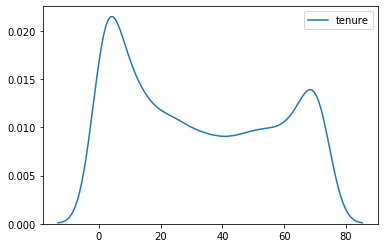

In [73]:
sns.kdeplot(data= telco_data['tenure'])

The density of the given data in the **"tenure"** column, the PDF rises to the max near 0 as well as around 65. Again the total area covered by the KDE plot is 1. Tenure and TotalCharges may have some relations in between because normally as the customer stays long, the TotalCharges increase. Lets have a look.

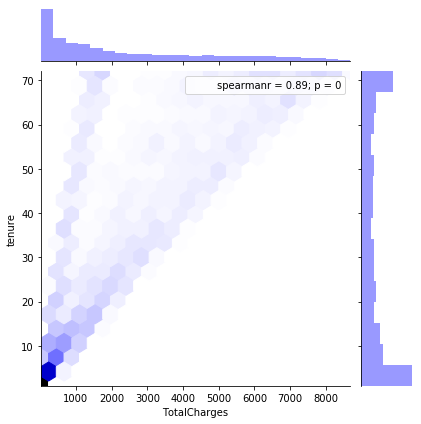

In [74]:
sns.jointplot(x='TotalCharges',y='tenure',data=telco_data,kind='hex',color='blue',stat_func=spearmanr)

As we can observe above, the data has a strong regression trend and they are correlated strongly.

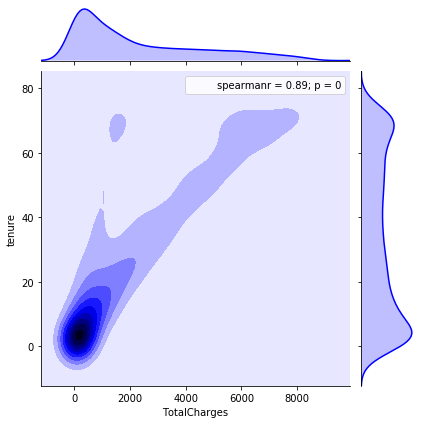

In [75]:
sns.jointplot(x='TotalCharges',y='tenure',data=telco_data,kind='kde',color='blue',stat_func=spearmanr)

There is a single darker jone and the plot shows a stronger correlation. **tenure** data is distributed almost uniform(with two bumps) but **TotalCharges** has a maximum bump as shown, which in term gives rises to only a single darkest zone (density of data more)

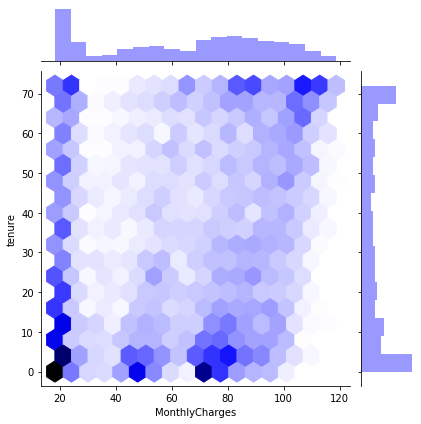

In [76]:
sns.jointplot(x='MonthlyCharges',y='tenure',data=telco_data,kind='hex',color='blue')

The hex plot doesn't show so much of correlation in between **"MonthlyCharge"** and **"tenure"**, but there is a positive correlation for sure.

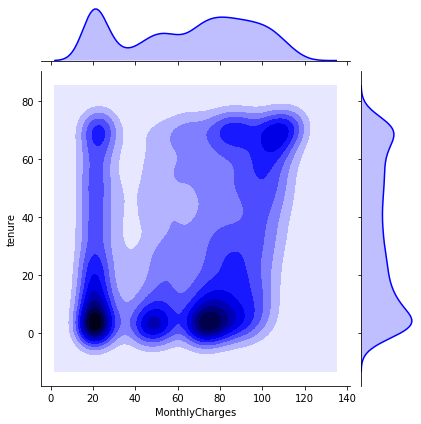

In [77]:
sns.jointplot(x='MonthlyCharges',y='tenure',data=telco_data,kind='kde',color='blue')

Seems like **tenure** and **MonthlyCharges** are very much irregular in terms of any relation between them

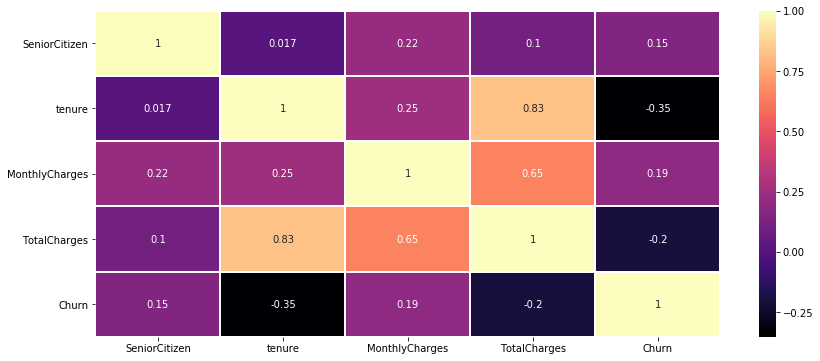

In [78]:
plt.figure(figsize = (14,6))
sns.heatmap(telco_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

The maximum correlation is in between **"tenure"** and **"TotalCharges"**, while **"TotalCharges"** and **"MonthlyCharges"** have a fairly well correlation.

In [79]:
def plot_sns(variable1,variable2):
    sns.FacetGrid(telco_data, hue = variable1, size = 7).map(sns.distplot, variable2)
    plt.title("Histogram of {} and {}".format(variable1,variable2))
    plt.ylabel("Density")
    plt.legend(title=variable1,fontsize=14,title_fontsize=15)
    plt.show()

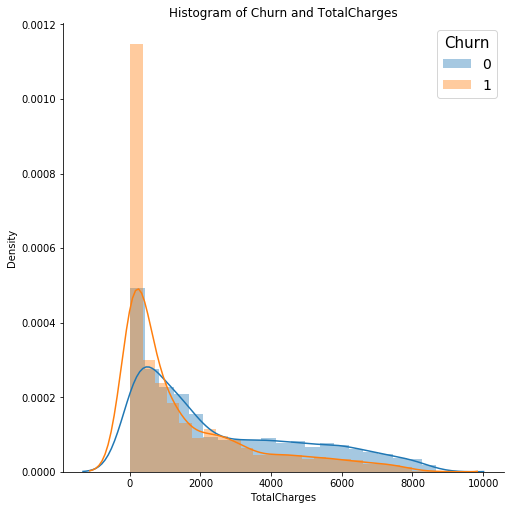

In [80]:
plot_sns("Churn","TotalCharges")

The probability density of **churing** is highest between a TotalCharge of 0 and 2000 and surprisingly, **not churning** density is highest between 0 and 2000 too, but the **not churning** density is less than **churing** density. Which means in that region there is a high probability of churning for the customer.

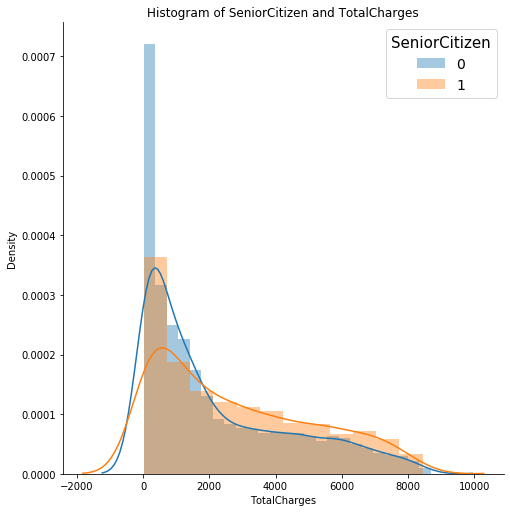

In [81]:
plot_sns("SeniorCitizen","TotalCharges")

**Not Churning** has a maximum density in between 0 and 2000 where has churing has the maximum in the same region, but the density of **Not Churning** more. 

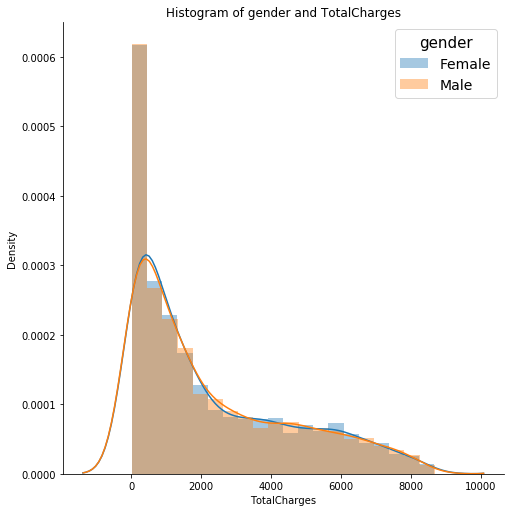

In [82]:
plot_sns("gender","TotalCharges")

**gender** is not so much helpful in analysis. Hence the data is not biased towards **gender**

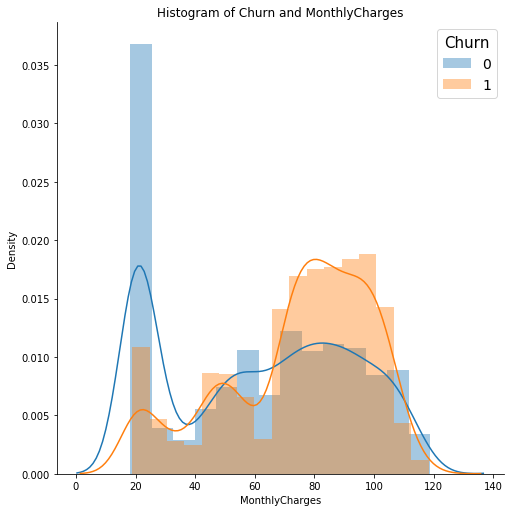

In [83]:
plot_sns("Churn","MonthlyCharges")

This data is not so much helpful either. The **churn** and **not churn** density varies a lot in accordance with monthly charges. As seen in the KDE plots before,threre are many bumps(local maximums) in tha data which can not be used in getting a survival trend.

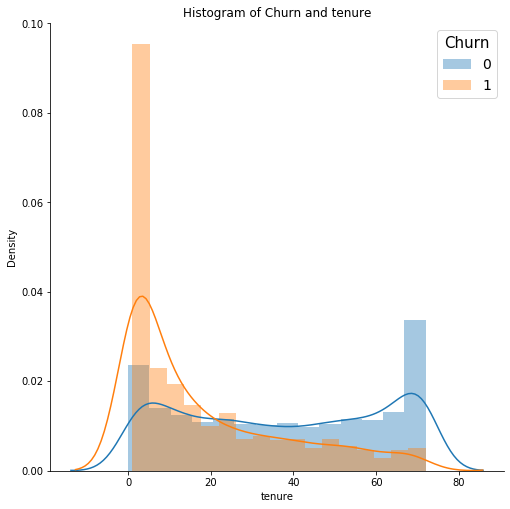

In [86]:
plot_sns("Churn","tenure")

Most of the customers left in the tenure of 0 to 20, I mean **churning** density is maximum in between 0 and 20. Also **Not Churning** density has two bumps. In 0 to 20 range, the probability of churning is much higher than **not churning** and in the range of 60 to 80 the **not churning** density is more than **churning**. It clears that tenure can be a determining factor in our survival model.

### Conclusion from EDA

So as **tenure** and **TotalCharges** are fairly correlated, we have our duration data as **tenure** and observations as **Churn**, we can consider other parameters like **TotalCharges** and **MonthlyCharges** as other parameters for our business analysis if required. Also the target can be selected as **left the company as a customer** for our survival anaysis model.